In [1]:
import dataprocess2 as dp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Load raw spectra to create SpecChunk object

In [20]:
data = dp.SpecChunk(protocolList=[1,2], process=True)

Removing useless data...
Linear Interpolating NaN...
Removing heads and tails...


In [21]:
print('Protocol List=', data.pList)
print('\nColumn Name=', data.colName)
print('\nActivity Dictionary:')
for a in data.actID:
    print('actID={}, \t spectrum shape={}'.format(a, data.actDict[a].shape))

Protocol List= [1, 2]

Column Name= ['timestamp', 'activityID', 'heart_rate', 'hand_temp', 'hand_acc16g_x', 'hand_acc16g_y', 'hand_acc16g_z', 'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z', 'hand_mag_x', 'hand_mag_y', 'hand_mag_z', 'chest_temp', 'chest_acc16g_x', 'chest_acc16g_y', 'chest_acc16g_z', 'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z', 'chest_mag_x', 'chest_mag_y', 'chest_mag_z', 'ankle_temp', 'ankle_acc16g_x', 'ankle_acc16g_y', 'ankle_acc16g_z', 'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z', 'ankle_mag_x', 'ankle_mag_y', 'ankle_mag_z']

Activity Dictionary:
actID=1, 	 spectrum shape=(46617, 33)
actID=2, 	 spectrum shape=(41825, 33)
actID=3, 	 spectrum shape=(43293, 33)
actID=17, 	 spectrum shape=(48453, 33)
actID=16, 	 spectrum shape=(39624, 33)
actID=12, 	 spectrum shape=(25232, 33)
actID=13, 	 spectrum shape=(22112, 33)
actID=4, 	 spectrum shape=(50786, 33)
actID=7, 	 spectrum shape=(46004, 33)
actID=6, 	 spectrum shape=(44683, 33)
actID=5, 	 spectrum shape=(26503, 33)
actID

## Create a SegChunk object from a SpecChunk object

In [22]:
segData = dp.SegChunk(data, duration=4, tError=0.02)

Segment Counts:
actID=1,	 count=115
actID=2,	 count=103
actID=3,	 count=107
actID=17,	 count=120
actID=16,	 count=98
actID=12,	 count=60
actID=13,	 count=52
actID=4,	 count=125
actID=7,	 count=114
actID=6,	 count=110
actID=5,	 count=65
actID=24,	 count=54
Total counts= 1123


In [23]:
print('Column Name=', segData.colName)
print('\nActivity Dictionary:')
for a in segData.actID:
    print('actID={}, \t segment count={},\t segment shape={}'.format(a, len(segData.actDict[a]), segData.actDict[a][0].shape))

Column Name= ['timestamp', 'activityID', 'heart_rate', 'hand_temp', 'hand_acc16g_x', 'hand_acc16g_y', 'hand_acc16g_z', 'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z', 'hand_mag_x', 'hand_mag_y', 'hand_mag_z', 'chest_temp', 'chest_acc16g_x', 'chest_acc16g_y', 'chest_acc16g_z', 'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z', 'chest_mag_x', 'chest_mag_y', 'chest_mag_z', 'ankle_temp', 'ankle_acc16g_x', 'ankle_acc16g_y', 'ankle_acc16g_z', 'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z', 'ankle_mag_x', 'ankle_mag_y', 'ankle_mag_z']

Activity Dictionary:
actID=1, 	 segment count=115,	 segment shape=(400, 33)
actID=2, 	 segment count=103,	 segment shape=(400, 33)
actID=3, 	 segment count=107,	 segment shape=(400, 33)
actID=17, 	 segment count=120,	 segment shape=(400, 33)
actID=16, 	 segment count=98,	 segment shape=(400, 33)
actID=12, 	 segment count=60,	 segment shape=(400, 33)
actID=13, 	 segment count=52,	 segment shape=(400, 33)
actID=4, 	 segment count=125,	 segment shape=(400, 33)
actID=7, 

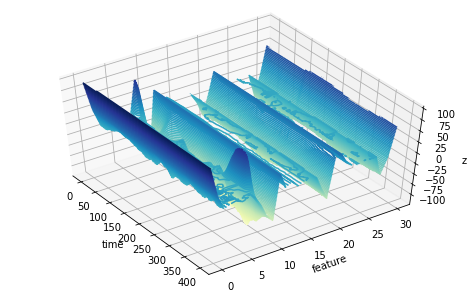

In [24]:
segData.showContour(act=17, index=40)

## Add Simple Features:

In [25]:
colList = segData.colName[2:10]
segData.addSimpleFeature(colList, 'mean', np.mean)

print('segment shape=', segData.actDict[12][40].shape)

segment shape= (401, 33)


## Add Pairwise Features:
**Adding a pairwise feature will add an extra column to segment checks.**

In [26]:
def squareAndSum(valueList):
    return np.sum([valueList[i]**2 for i in range(len(valueList))])

In [27]:
colList = ['hand_acc16g_x', 'hand_acc16g_y', 'hand_acc16g_z']
segData.addPairwiseFeature(colList, 'hand_acc16g_sqsum', squareAndSum)

print('segment shape=', segData.actDict[12][40].shape)

segment shape= (401, 34)


### Add Another Simple Feature:

In [28]:
colList = ['hand_temp', 'chest_temp', 'ankle_temp']
segData.addSimpleFeature(colList, 'median', np.median)

print('segment shape=', segData.actDict[12][40].shape)

segment shape= (402, 34)


### Add Another Pairwise Feature:

In [29]:
colList = ['ankle_acc16g_x', 'ankle_acc16g_y', 'ankle_acc16g_z']
segData.addPairwiseFeature(colList, 'ankle_acc16g_sqsum', squareAndSum)

print('segment shape=', segData.actDict[12][40].shape)

segment shape= (402, 35)


In [32]:
print('Row Features:\n', segData.featureName)
print('\nColumn Features:\n', segData.colName)

Row Features:
 ['heart_rate_mean', 'hand_temp_mean', 'hand_acc16g_x_mean', 'hand_acc16g_y_mean', 'hand_acc16g_z_mean', 'hand_gyro_x_mean', 'hand_gyro_y_mean', 'hand_gyro_z_mean', 'hand_temp_median', 'chest_temp_median', 'ankle_temp_median']

Column Features:
 ['timestamp', 'activityID', 'heart_rate', 'hand_temp', 'hand_acc16g_x', 'hand_acc16g_y', 'hand_acc16g_z', 'hand_gyro_x', 'hand_gyro_y', 'hand_gyro_z', 'hand_mag_x', 'hand_mag_y', 'hand_mag_z', 'chest_temp', 'chest_acc16g_x', 'chest_acc16g_y', 'chest_acc16g_z', 'chest_gyro_x', 'chest_gyro_y', 'chest_gyro_z', 'chest_mag_x', 'chest_mag_y', 'chest_mag_z', 'ankle_temp', 'ankle_acc16g_x', 'ankle_acc16g_y', 'ankle_acc16g_z', 'ankle_gyro_x', 'ankle_gyro_y', 'ankle_gyro_z', 'ankle_mag_x', 'ankle_mag_y', 'ankle_mag_z', 'hand_acc16g_sqsum', 'ankle_acc16g_sqsum']


## Flatten a segment chunk into a segment list:

**(Do this only after feature extraction is completed)**

In [33]:
segData.flatten()

In [34]:
print('Length of a segment list should be:', segData.t*len(segData.colName)+len(segData.featureName))
print('\nActivity Dictionary:')
for a in segData.actID:
    print('actID={}, \t segment count={},\t segment shape={}'.format(a, len(segData.actDict[a]), segData.actDict[a][0].shape))

Length of a segment list should be: 14011

Activity Dictionary:
actID=1, 	 segment count=115,	 segment shape=(14011,)
actID=2, 	 segment count=103,	 segment shape=(14011,)
actID=3, 	 segment count=107,	 segment shape=(14011,)
actID=17, 	 segment count=120,	 segment shape=(14011,)
actID=16, 	 segment count=98,	 segment shape=(14011,)
actID=12, 	 segment count=60,	 segment shape=(14011,)
actID=13, 	 segment count=52,	 segment shape=(14011,)
actID=4, 	 segment count=125,	 segment shape=(14011,)
actID=7, 	 segment count=114,	 segment shape=(14011,)
actID=6, 	 segment count=110,	 segment shape=(14011,)
actID=5, 	 segment count=65,	 segment shape=(14011,)
actID=24, 	 segment count=54,	 segment shape=(14011,)
